Below you see the generated output of "tests/pool.py". In general, the provided test files cover all module properties currently available. 

![](multi-module.png)

This is a tutorial for our figure generator. We will go in more detail about how to create a figure based on a single grid module. 
A grid contains images in a grid-like arrangment (see image below). This module provides many options where to place additional content to the images: some can be placed on top of images or around them.

![](grid-layout.PNG)

A figure can have multiple modules (see pool scene above), which will be aligned automatically based on the total width. 

The following code lines are only needed to show the figure result in jupyter. We have one additional dependency: pdf2image.

In [1]:
from pdf2image import convert_from_path
from IPython.display import Image
import cv2

def loadpdf(pdfname):
    images = convert_from_path(pdfname, dpi=1000)
    return np.array(images[0])

def convert(pdfname):
    img = loadpdf(pdfname)
    cv2.imwrite(pdfname.replace('.pdf', '.png'), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    return pdfname.replace('.pdf', '.png')

First we need to import the figure generator, so that we can create such figures.
The other two imports contain useful functions to work with image data. 
"util" focusses on image processing (luminance, crop, etc.) and image comparisons, supporting common error metrics in rendering. 

In [2]:
import generator
from generator import util
import numpy as np

To create a figure containing a grid-module, we first need some image data. We define some colors to generate test images. Typically, the user has his own image data, that he can load and process. 
We also define some colors for later use (frames, background colors, ...).
A color is a list of three values representing the (r,g,b) channels, while each value is of type integer ranging from 0 to 255.

In [3]:
# define some colors (r,g,b)
yellow=[232, 181, 88]
l_blue=[94, 163, 188]
blue=[82, 110, 186]
orange=[186, 98, 82]

# generate test images
img_blue = np.tile([x / 255 for x in l_blue], (32, 64, 1))
img_yellow = np.tile([x / 255 for x in yellow], (32, 64, 1))

# load the two images
images = [
    generator.util.image.lin_to_srgb(img_blue),
    generator.util.image.lin_to_srgb(img_yellow)
]

In the following we create an empty grid with two rows and three columns.
A grid is only valid, if each element of the grid has an image.

In [4]:
# create 'empty' Grid with num_rows, num_cols
grid = generator.Grid(num_rows=2, num_cols=3)

# fill grid with image data
e1 = grid.get_element(0,0).set_image(images[0])
e2 = grid.get_element(0,1).set_image(images[1])
e3 = grid.get_element(0,2).set_image(images[0])
e4 = grid.get_element(1,0).set_image(images[1])
e5 = grid.get_element(1,1).set_image(images[0])
e6 = grid.get_element(1,2).set_image(images[1])

This can already be a used to create a figure.
To generate the figure the user provides the list of modules - in this case one grid, the figure width and a filename. The filename ending defines which backend will be used. The figure generator offers three backends: LaTeX (.pdf), HTML (.html) and PPTX (.pptx). HTML is the fastest to generate, while LaTeX takes the longest (few seconds).

Note: We differentiate between text-fields (titles, labels, captions), image-elements and others (markers, frames). If we say elements or images we refer to image-elements. 

In [5]:
# generate figure with LaTeX
generator.horizontal_figure([grid], width_cm=18., filename='singlemodule_test.pdf')

# show result
pngname = convert("singlemodule_test.pdf")

total width of generated tikz module:  180.0
total height of generated tikz module:  60.266666666666666
Tikz/LaTeX file was generated.


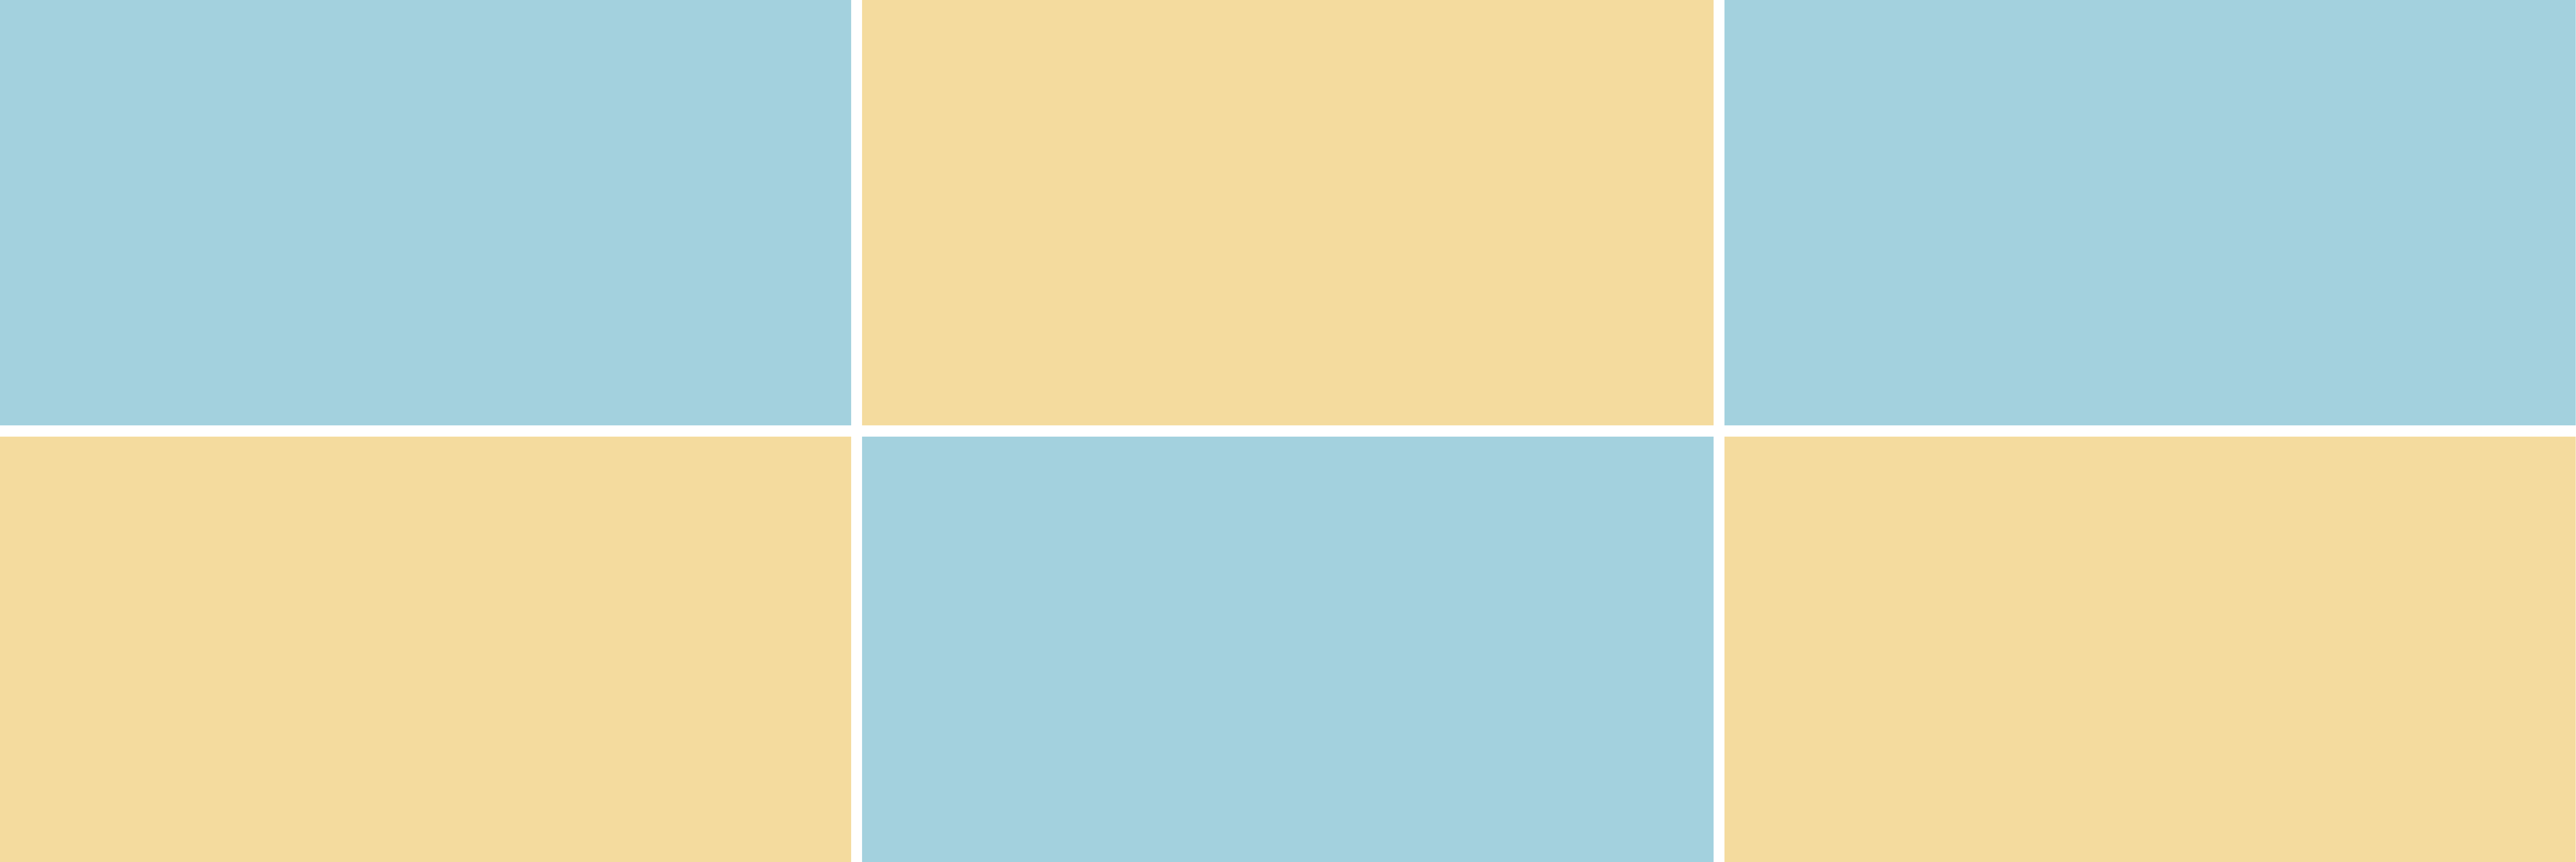

In [6]:
Image(filename=pngname)

Each grid has it's own layout. The user can set the layout and content in any order.

Layout: 
To make sure, that the user does not need to set every little layout-property there exist, we provide a default layout ('figuregenerator/generator/default_layouts.py'). Every value not set, will get the default value within that file. 

Units:
Most units are in mm (millimeter, type:float). Some are in points (concerning linewidths and fontsizes) or pixels (concerning images).

Here we apply paddings at the top (0.5 mm) and bottom of the module (1.5 mm). You can also define column and row paddings (e.g. column=1.2). If you want to have paddings between modules, you can define within a module a right or left padding.

In [7]:
layout = grid.get_layout()
layout.set_padding(top=0.5, bottom=1.5)

We can set markers (rectangles) on top of an image. In rendering, this is the most common practice to mark crops in a scene (compare pool scene above). Marker properties (linewidth, bool_dashed) can be varied for each image, but not within an image.

In [8]:
# marker (default marker props)
e1.set_marker(pos=[32,12], size=[15,10], color=blue)
e1.set_marker(pos=[1,1], size=[15,10], color=orange)

Frames can be set for each element individually. Intended behaviour: They are placed on top of an image - not around, so that they don't overlap with other content.

In [9]:
# frame
e2.set_frame(linewidth=2., color=blue)

In [10]:
# generate figure with LaTeX
generator.horizontal_figure([grid], width_cm=18., filename='singlemodule_test.pdf')

# show result
pngname = convert("singlemodule_test.pdf")

total width of generated tikz module:  180.0
total height of generated tikz module:  62.266666666666666
Tikz/LaTeX file was generated.


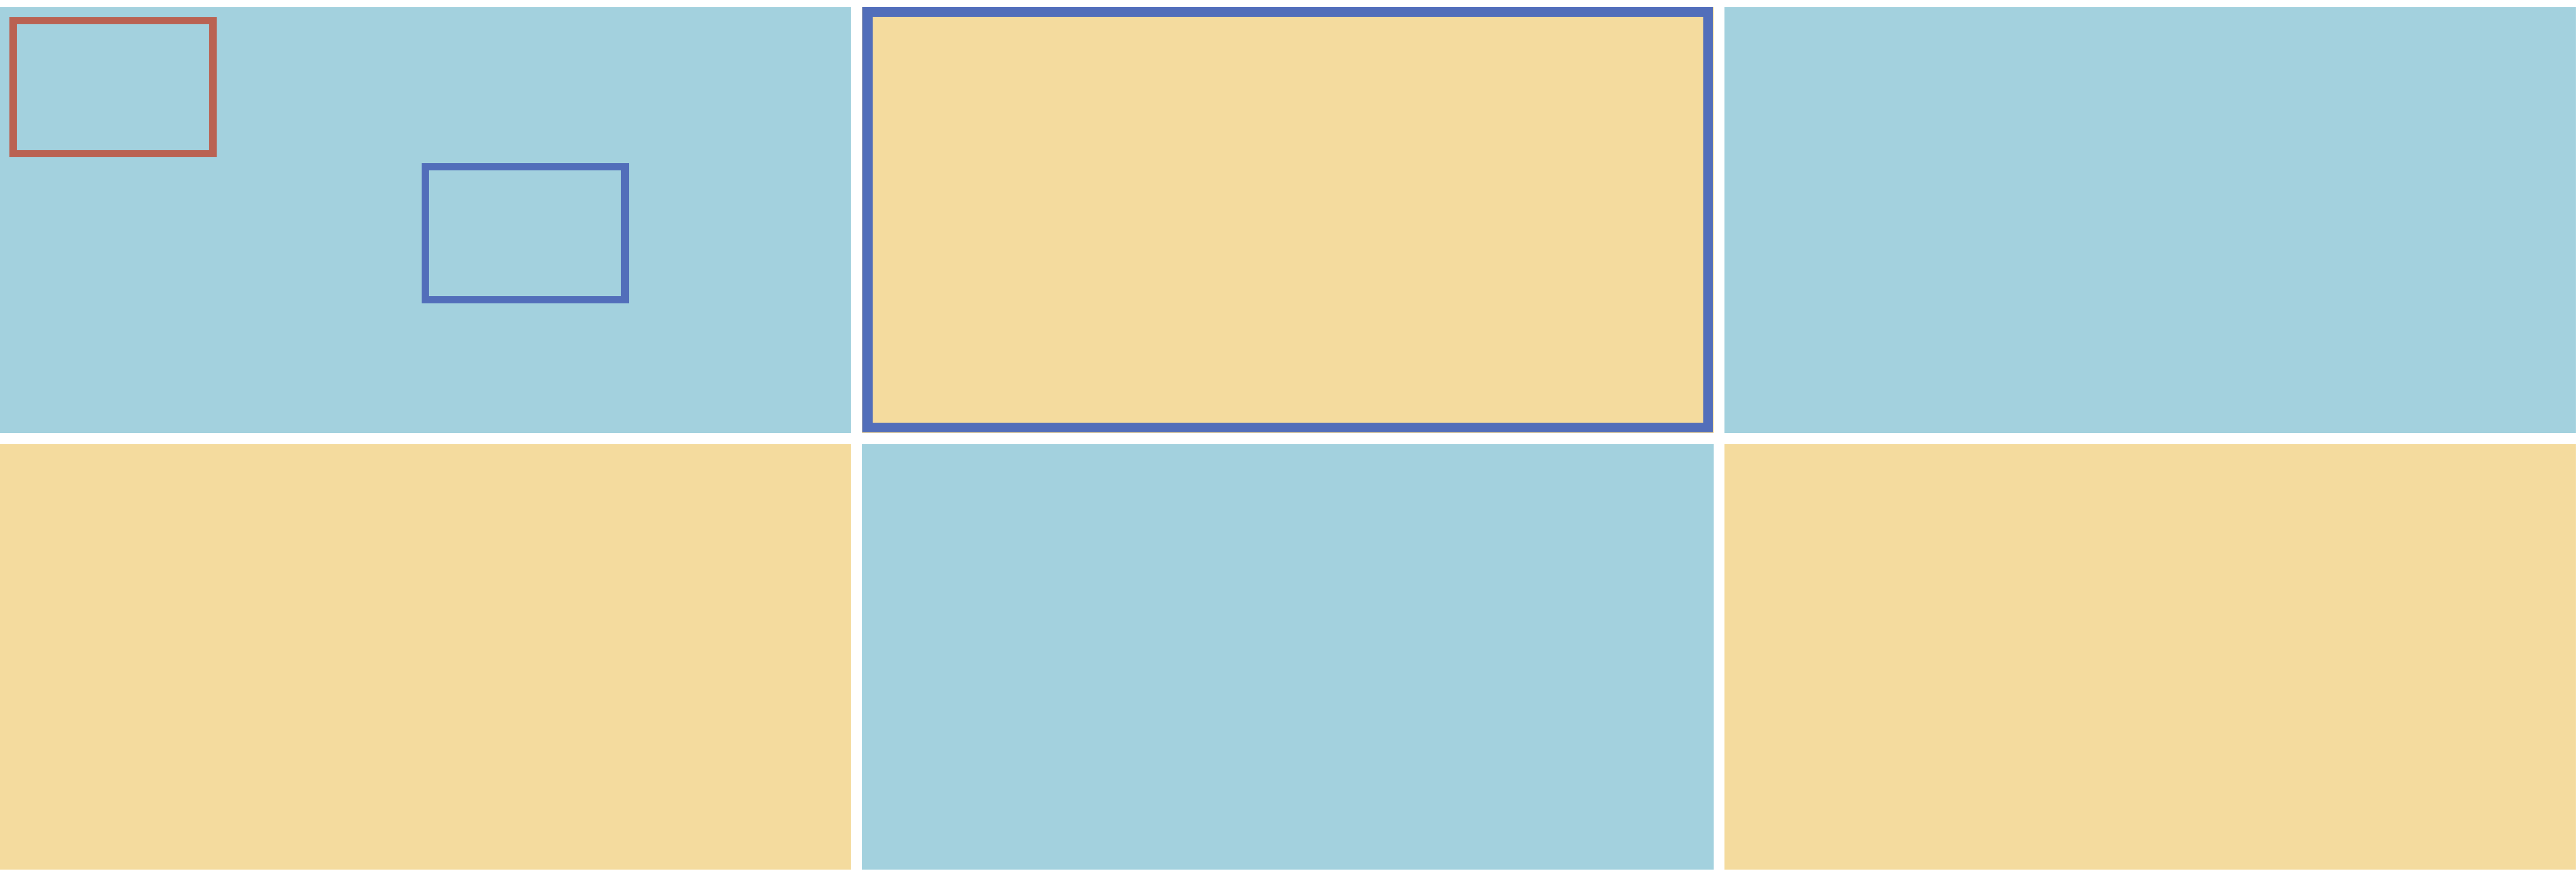

In [11]:
Image(filename=pngname)

Each element can have it's own caption (below image). For alignment reason, if one image of a grid has a caption, all images of that grid have a caption-placeholder (empty string, until overwritten).

New Lines: are applied like in LaTeX. Because of python behaviour we need to 4 backslashes ("example\\\\\\\\2nd line") instead of two. To avoid this, you can use python raw-strings (r"example\\\\2nd line").

Caption properties are set in the layout for all captions - can be set before or after adding captions. 


In [12]:
# subtitles/captions for each element
e1.set_caption('hallo!')
e2.set_caption('und')
e3.set_caption('tschau!tschau!')
e4.set_caption('hallo!')
e5.set_caption('und')
e6.set_caption('tschau!tschau!')
layout.set_caption(height_mm=4.0, fontsize=9, txt_color=[170,170,170])

Labels are placed on top of images. Each image has 6 label positions (each independent): "top_left", "top_center", "top_right", "bottom_left", etc. 
Because labels don't share common properties, we didn't seperate content from layout.

Label _offset_mm_ (special): If position is "x_left" or "x_right", the argument needs a tuple of (left, right) offsets. If position is "x_center", it needs only one argument - if a tuple is given, it will only consider the first value for the offset.

The text alignment is based on the position. For example, "x_left" aligns the text left.

In [13]:
# labels (examples, each element can have in total 6 labels on each valid position)
e4.set_label("bottom center", pos='bottom_center', width_mm=25., height_mm=4.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=None)
e4.set_label("top\\\\right", pos='top_right', width_mm=8., height_mm=7.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=[255,255,255])
e4.set_label(r"top\\left", pos='top_left', width_mm=8., height_mm=7.0, offset_mm=[1.0, 1.0], 
                  fontsize=9, bg_color=orange, txt_color=[255,255,255])

Let's see the changes made on the figure.

In [14]:
# generate figure with LaTeX
generator.horizontal_figure([grid], width_cm=18., filename='singlemodule_test.pdf')

# show result
pngname = convert("singlemodule_test.pdf")

total width of generated tikz module:  180.0
total height of generated tikz module:  70.26666666666667
Tikz/LaTeX file was generated.


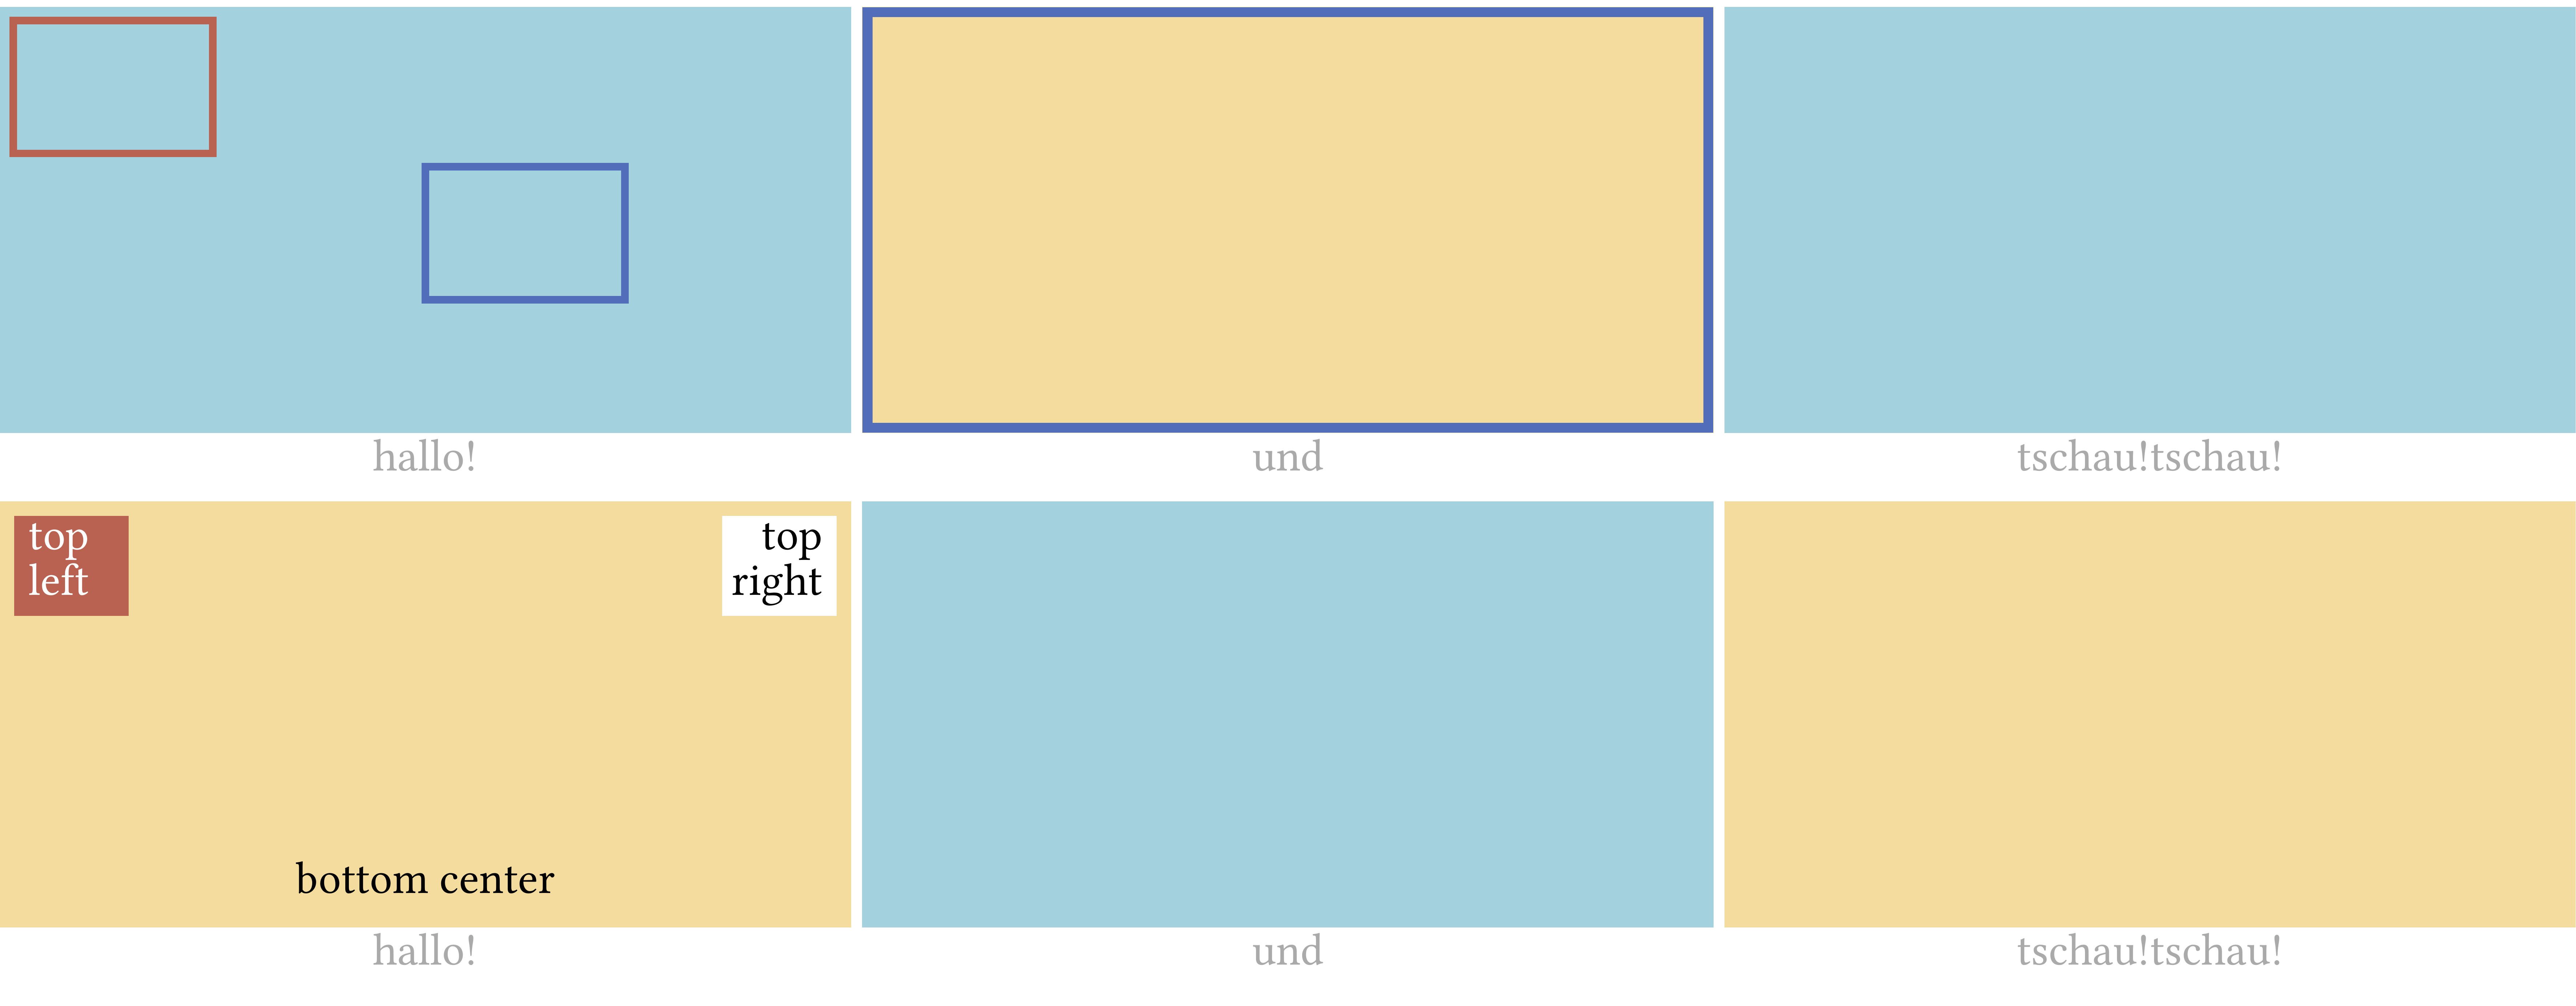

In [15]:
Image(filename=pngname)

Module titles can placed around the module. Valid positions are "top"/"north", "left"/"west", etc.
The properties can be handled seperately. 

_field_size_: means width or height of the text-field. If the title is "north"/"south" _field_size_ corresponds to the height. The width is calculated automatically - like in the "Grid-Layout" shown at the beginning. If the title is "east"/"west" it corresponds to the width and the height is calculated.

In case the user set's the content for a text-field (e.g. caption or title), but forgot to define a _field_size_ in the layout, we set a height/width to that text-field to ensure, that the content will be shown.

In [16]:
# module titles
grid.set_title('top', 'Top Title')
layout.set_title('top', field_size_mm=5., offset_mm=2.,fontsize=12, bg_color=orange, txt_color=[255,255,255])

grid.set_title('left', 'Left Title')
layout.set_title('left', field_size_mm=4., offset_mm=2.,fontsize=12)

Like module titles we can define row or column titles.
Instead of a single string, the figure generator wants a list of strings.

_offset_mm_ (text-fields in general): Like in the "Grid-Layout" hinted, we have some paddings corresponding to text-fields. These might be of interest, so that the text is not "glued" to other content.

_txt_rotation_ (text-fields in general): rotates the text content. Value is of type integer ranging from 0° (no rotation) to (-)90°. 90° = clockwise.

Note, we did not define the proper layout for column titles. Like discussed before, the content will still be shown, because of some defaults.

In [17]:
# Row and column titles
grid.set_row_titles('left', ['Row Titles', 'are better'])
layout.set_row_titles('left', field_size_mm=10., offset_mm=1., fontsize=9, txt_rotation=0, bg_color=[blue, l_blue])

grid.set_col_titles('north', ['Col Titles', 'are', 'The Best'])

This is basically everything concerning a grid-module. You could also add more modules. The order of the grids in the lists are the same as in the figure (from left to right). You can also change the arguments to [grid, grid] if you like or the width.

In [18]:
generator.horizontal_figure([grid], width_cm=18., filename='singlemodule_test.pdf')
#generator.horizontal_figure([grid], width_cm=18., filename='singlemodule_test.pptx')
#generator.horizontal_figure([grid], width_cm=18., filename='singlemodule_test.html')

pngname = convert("singlemodule_test.pdf")

total width of generated tikz module:  180.0
total height of generated tikz module:  74.6
Tikz/LaTeX file was generated.


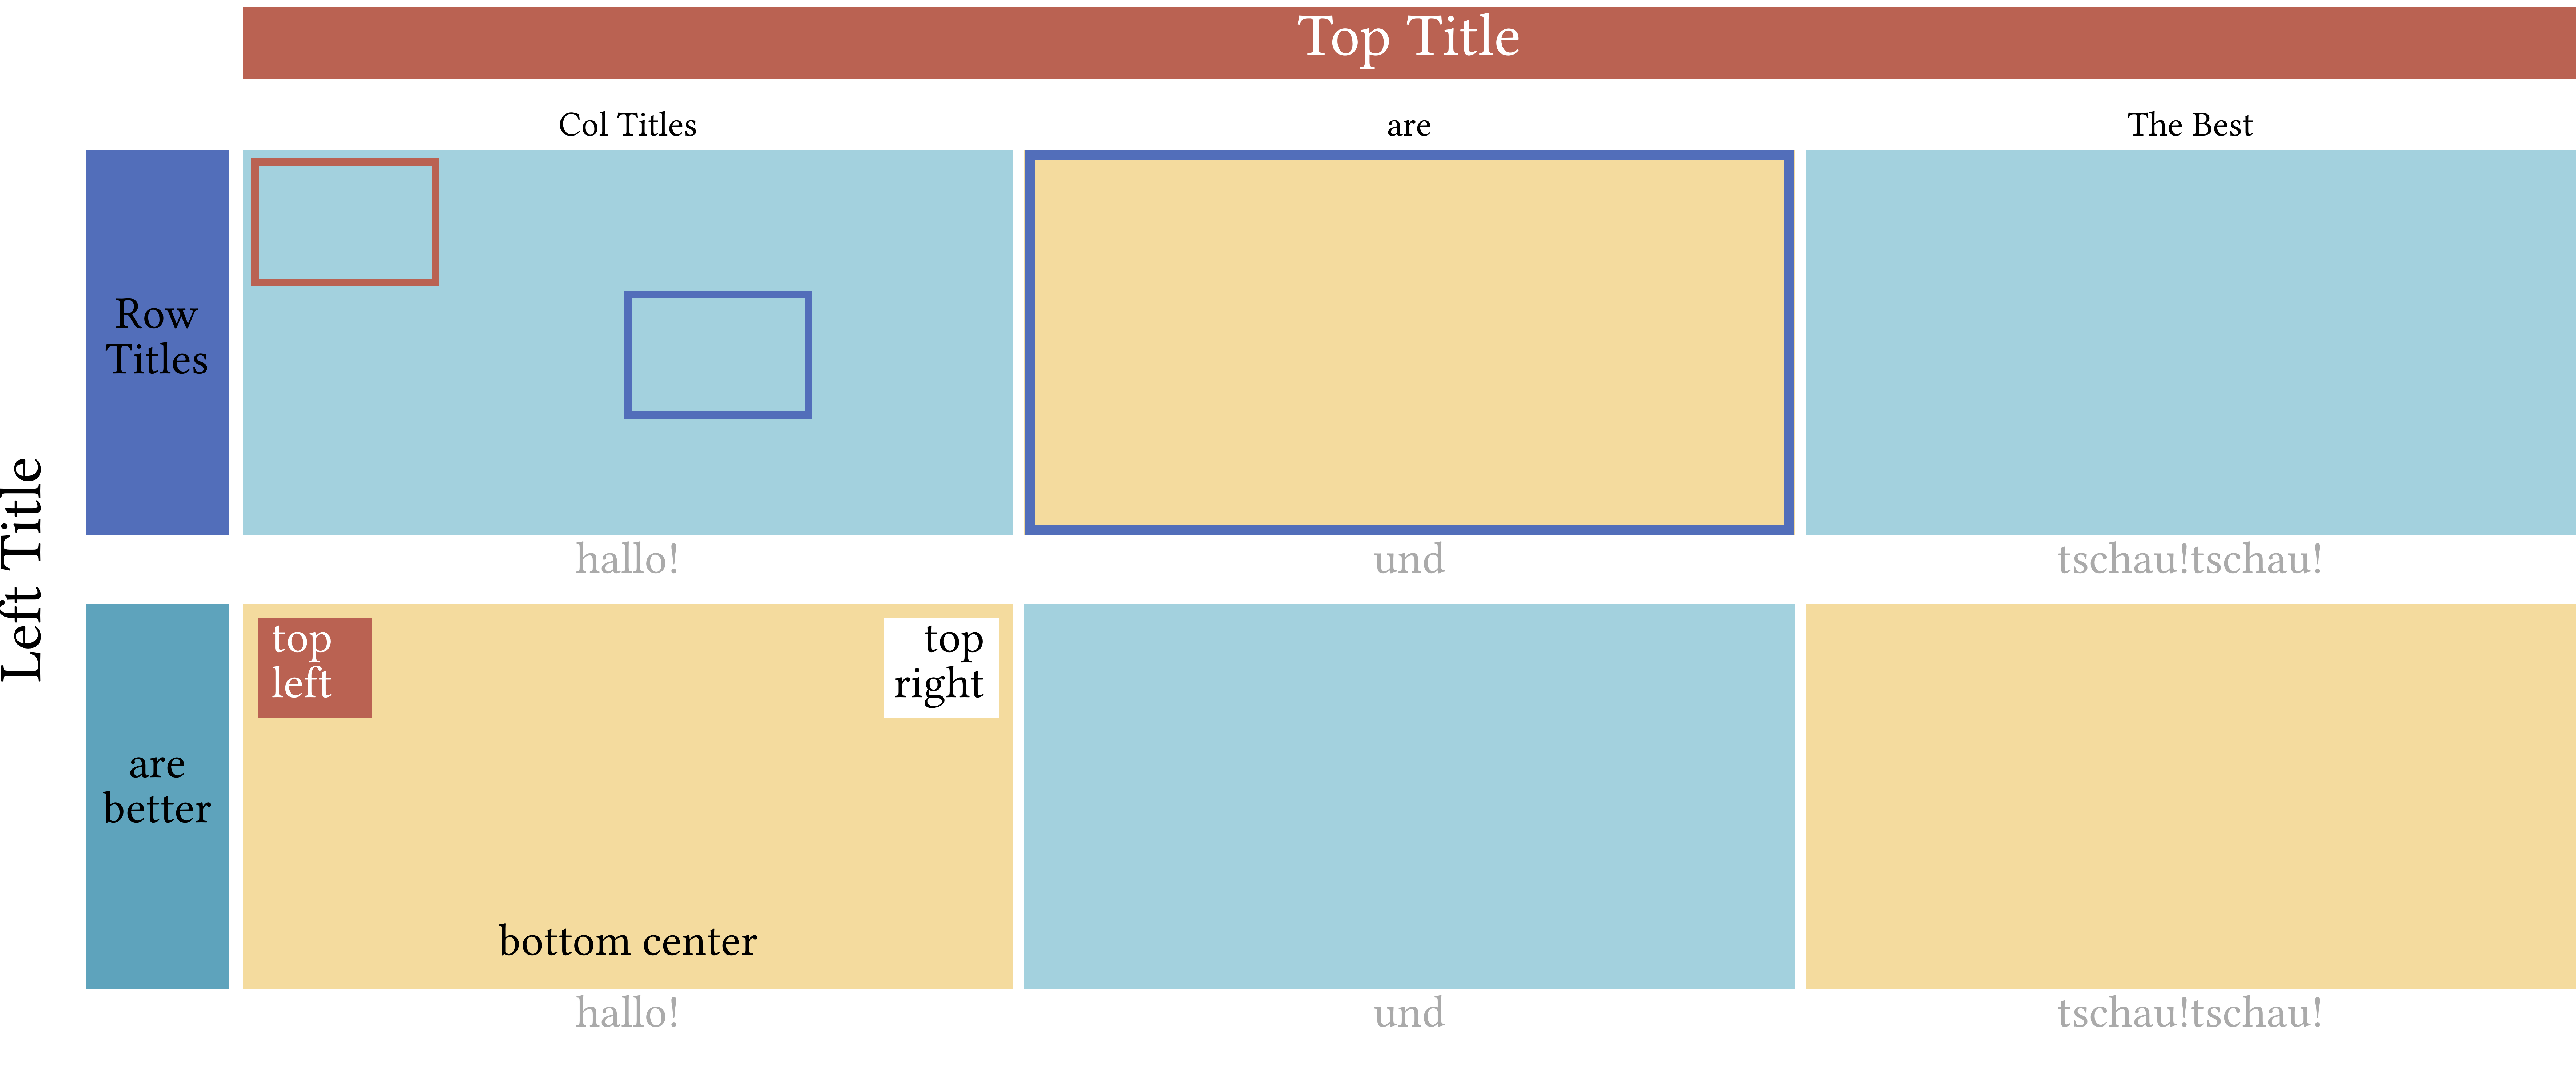

In [19]:
Image(filename=pngname)